_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_
_/\__/\_MRA started with HatBasis wavelets
_/\__/\_resolution 1; dilation 0.5


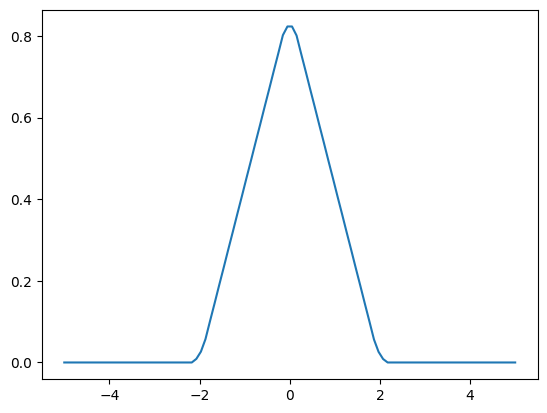

In [1]:
import mrafit.wavelet_bases as wavelet_bases
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

# To check the effect of resolution on the wavelets lets us take an example:
# Here the function we want to fit is sigmoid function and we will fit it with 
# various basis functions. The basis function is first plotted in order to have
# idea of visual appearance of the basis

# Stating with hat basis function with resoltion 1

hatbasis = wavelet_bases.HatBasis(resolution=1)

# As a general note , we will use N as symbol for number of division on the grid
N = 100 ## This means a grid from (-5,5) on number line with be divided into 100 part

X = np.linspace(-5, 5, N)
plt.plot(X, hatbasis.get_wavefunction_values(0, X))

_/\__/\_Non orthogonal basis : Calculating overlap matrix
_/\__/\_Calculating inverse of overlap matrix
_/\__/\_Calculating coefficients of input function
_/\__/\_MRA Complete!
_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_


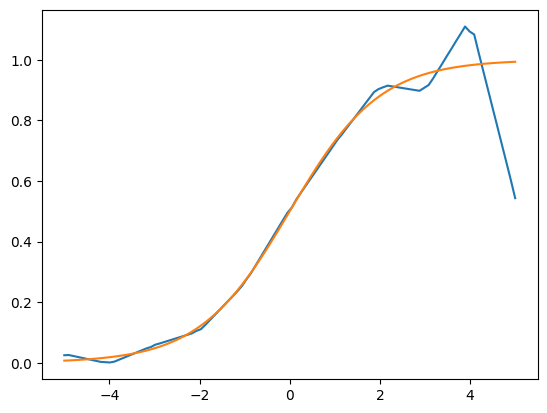

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
        
coeffs, Yet, err = hatbasis.get_mra_approx(sigmoid, X)
plt.plot(X, Yet)
plt.plot(X, [sigmoid(x) for x in X])


_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_
_/\__/\_MRA started with HatBasis wavelets
_/\__/\_resolution 0.4; dilation 0.5
_/\__/\_Non orthogonal basis : Calculating overlap matrix
_/\__/\_Calculating inverse of overlap matrix
_/\__/\_Calculating coefficients of input function
_/\__/\_MRA Complete!
_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_


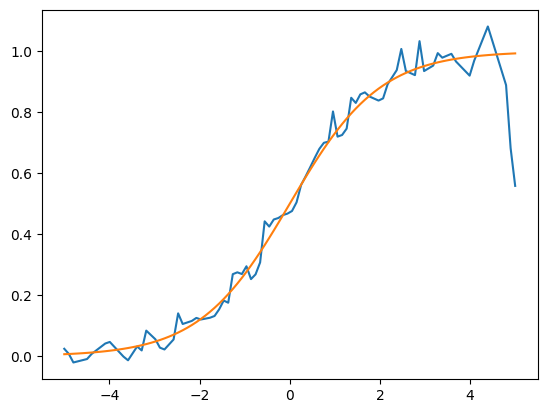

In [3]:
# now we will define the basis again this time with lower resolution

hatbasis = wavelet_bases.HatBasis(resolution=0.4)
coeffs, Yet, err = hatbasis.get_mra_approx(sigmoid, X)
plt.plot(X, Yet)
plt.plot(X, [sigmoid(x) for x in X])

# Which leads to much noisy fitting than expected

_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_
_/\__/\_MRA started with HatBasis wavelets
_/\__/\_resolution 0.5; dilation 0.5
_/\__/\_Non orthogonal basis : Calculating overlap matrix
_/\__/\_Calculating inverse of overlap matrix
_/\__/\_Calculating coefficients of input function
_/\__/\_MRA Complete!
_/\__/\__/\__/\__/\__/\__/\__/\__/\__/\_


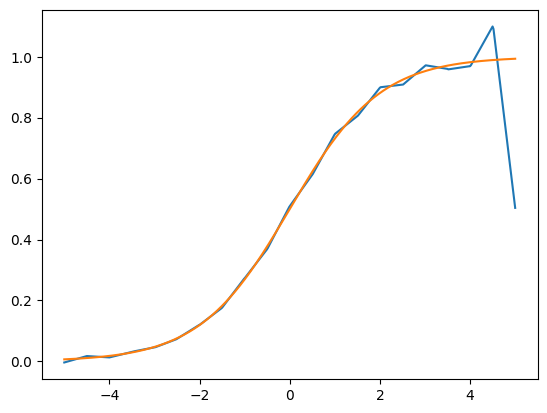

In [4]:
# However this can be fixed by incrasing N

hatbasis = wavelet_bases.HatBasis(resolution=0.5)
N = 500
X = np.linspace(-5, 5, N)
coeffs, Yet, err = hatbasis.get_mra_approx(sigmoid, X)
plt.plot(X, Yet)
plt.plot(X, [sigmoid(x) for x in X])

# Hence when increasing resolution, also make sure to incrase N
